<a href="https://colab.research.google.com/github/Neeraj255/Neeraj255/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [10]:
df = pd.read_csv('/content/internship.csv')

In [11]:
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [12]:
df.shape

(1002, 17)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [14]:
print(df.describe())

              year          price   cylinders      mileage       doors
count  1002.000000     979.000000  897.000000   968.000000  995.000000
mean   2023.916168   50202.985700    4.975474    69.033058    3.943719
std       0.298109   18700.392062    1.392526   507.435745    0.274409
min    2023.000000       0.000000    0.000000     0.000000    2.000000
25%    2024.000000   36600.000000    4.000000     4.000000    4.000000
50%    2024.000000   47165.000000    4.000000     8.000000    4.000000
75%    2024.000000   58919.500000    6.000000    13.000000    4.000000
max    2025.000000  195895.000000    8.000000  9711.000000    5.000000


In [15]:
print(df.isnull().sum())

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64


In [30]:
columns_to_drop = ['name', 'description', 'trim', 'make', 'model', 'exterior_color', 'interior_color']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [32]:
required_columns = ['price', 'mileage', 'year', 'engine', 'cylinders', 'fuel', 'transmission', 'body', 'doors', 'drivetrain']
df = df.dropna(subset=[col for col in required_columns if col in df.columns])

In [33]:
if 'engine' in df.columns:
    df['engine_size'] = df['engine'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
    df = df.drop(columns=['engine'])

In [34]:
categorical_cols = ['fuel', 'transmission', 'body', 'drivetrain']
categorical_cols_present = [col for col in categorical_cols if col in df.columns]
df = pd.get_dummies(df, columns=categorical_cols_present, drop_first=True)

In [35]:
X = df.drop(columns=['price'])
y = df['price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=200, random_state=42)

In [44]:
y_pred = model.predict(X_test)


In [45]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 70239996.16559708
R² Score: 0.8003469945536045


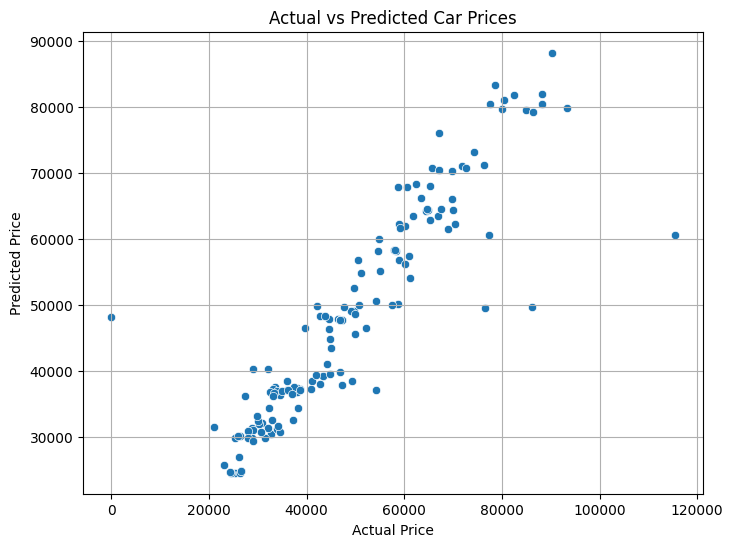

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()